<div style="text-align: center;">
    <img src="https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExaDYzZ3NhNzA3dW51aTcwMjV6MHc3ODNwajhpMXI2ZTdxa3pzbjBwbiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/L0wt2q0qBuCRaWGOsa/giphy-downsized-large.gif" alt="Dancing Pikachu" width="250"/>
</div>

<h1 style="color: #FF6347;">Unsupervised Learning: PCA</h1>

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. It transforms the data into a new coordinate system such that the greatest variance by any projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

## Theoretical Background

PCA involves the following steps:

1. **Standardize the Data**: Center the data by subtracting the mean of each feature and scale to unit variance.
2. **Covariance Matrix**: Compute the covariance matrix of the standardized data.
3. **Eigenvalues and Eigenvectors**: Calculate the eigenvalues and eigenvectors of the covariance matrix.
4. **Principal Components**: Sort the eigenvectors by decreasing eigenvalues and select the top k eigenvectors.
5. **Transform Data**: Project the original data onto the selected eigenvectors to get the principal components.

Mathematically, PCA can be represented as:

$$
 X_{new} = X \cdot W 
$$

where X is the original data, W is the matrix of selected eigenvectors, and X_new is the transformed data.

In [1]:
# 📚 Basic Libraries
import numpy as np 
import pandas as pd
import warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

<h2 style="color: #FF8C00;">PCA</h2>

**Principal Component Analysis (PCA)** is a statistical approach used in unsupervised learning to reduce the dimensionality of datasets with many variables, while preserving essential information. 
- It transforms a dataset into a smaller set of principal components, simplifying analysis without significant loss of information.
- PCA focuses on extracting insights from the data without relying on a response variable, unlike supervised learning methods. This makes it invaluable for identifying patterns and subgroups within the data, aiding in exploratory analysis where the goal is understanding rather than prediction.
- As a precursor to other statistical methods, PCA helps in managing complex datasets by "condensing" the information into fewer variables. This step is crucial for enhancing the efficiency of data analysis, especially when dealing with high-dimensional data.

<h2 style="color: #FF6347;">X-Y Split</h2>

<h2 style="color: #FF6347;">Standardization</h2>

<h2 style="color: #FF6347;">Model Selection</h2>

<h2 style="color: #FF6347;">Creating a new DataFrame</h2>

<h2 style="color: #FF6347;">Plotting the results</h2>

**Key Points**:
. Principal Component Analysis (PCA) reduces the dimensionality of a dataset by transforming it into a new set of variables, the principal components, which are ordered by the amount of variance they capture from the data. 
- The first principal component (PC1) accounts for the most variance, followed by the second (PC2), and so on. 
- This process allows for the simplification of the data, enabling easier visualization and analysis by highlighting the directions of maximum variance. In essence, PCA helps identify the most informative features of the data, reducing complexity without losing critical information.

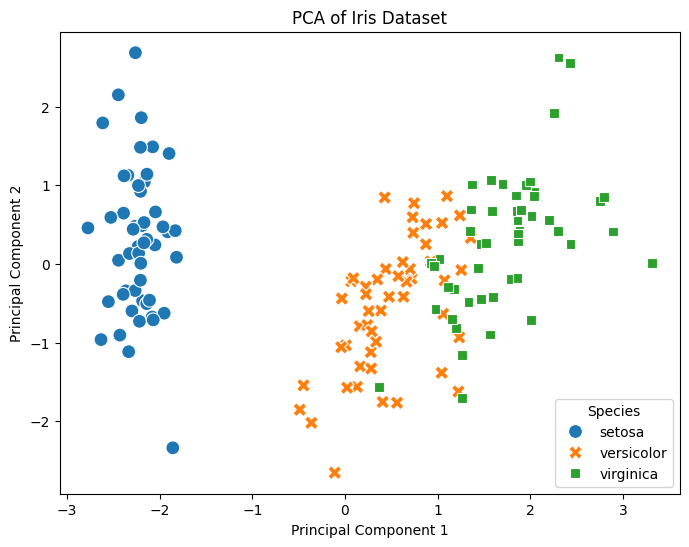

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', style='species', s=100)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()

- The Elbow method plot visualizes the inertia (sum of squared distances of samples to their nearest cluster center) for various numbers of clusters (k). 
- You're looking for a point on the curve where the decrease in inertia shifts from rapid to more gradual — the "elbow" point. 
- This point suggests that adding more clusters beyond this number results in diminishing returns in terms of gaining tighter clusters. 
- Therefore, it's considered an optimal balance between the number of clusters and the compactness of the clustering, indicating a good number of clusters to use for K-Means.

<h1 style="color: #FF6347;">EXTRA: More On Clustering</h1>

✅ **Common Clustering Methods:**
- **K-Means**: Divides data into `k` clusters, minimizing the variance within each.
- **Agglomerative Clustering**: A hierarchical method that builds clusters step-by-step.
- **DBSCAN**: Groups data based on density and is useful for detecting outliers.


<h2 style="color: #FF8C00;">Agglomerative Clustering</h2>


- **Hierarchical approach** that merges similar clusters step-by-step.
- Different **linkage criteria** affect results:
  - `ward` (default) → minimizes variance.
  - `complete` → maximizes inter-cluster distance.
  - `single` → minimizes distance between nearest points.

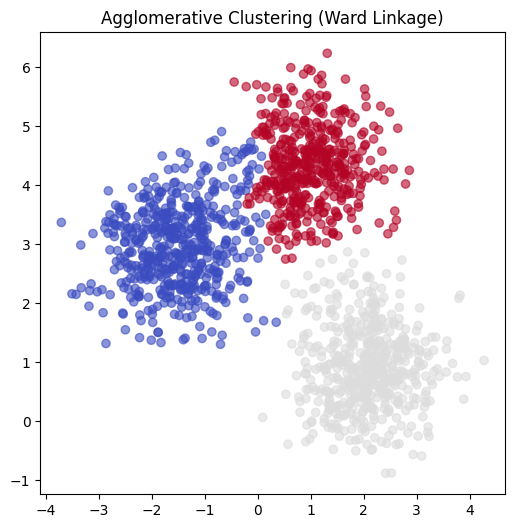

In [5]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_pred = agglomerative.fit_predict(X)

# Plot results
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.6, cmap='coolwarm')
plt.title("Agglomerative Clustering (Ward Linkage)")
plt.show()

<h2 style="color: #FF8C00;">DBSCAN (Density-Based Clustering)</h2>

- Groups data **based on density** rather than distance.
- **Key parameters**:
  - `eps`: Maximum distance for points to be considered neighbors.
  - `min_samples`: Minimum points required to form a cluster.
- Works well with **non-spherical clusters** and **outliers**.

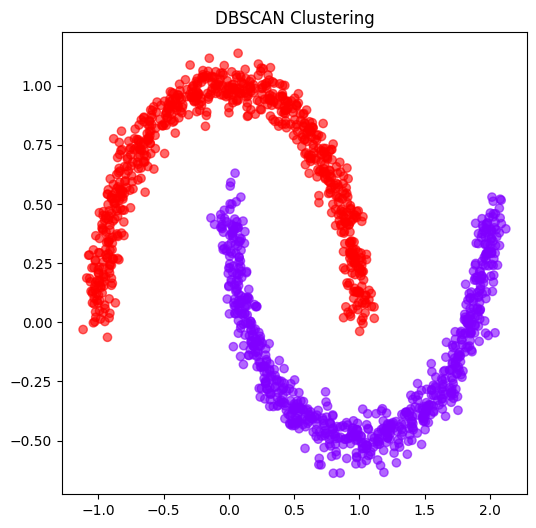

In [6]:
from sklearn.cluster import DBSCAN
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# Generate non-spherical data
n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)
y_pred = dbscan.fit_predict(X)

# Plot results
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='rainbow', alpha=0.6)
plt.title("DBSCAN Clustering")
plt.show()

<h2 style="color: #FF8C00;">Final Takeaways</h2>

- **K-Means** is simple and effective but works best with **spherical clusters**.
- **Agglomerative Clustering** is hierarchical and does not require `k`, but is computationally expensive.
- **DBSCAN** is excellent for **density-based clustering** and detecting **outliers**.
- **Silhouette Score** helps evaluate clustering quality.
- **The Elbow Method** helps determine the best number of clusters.

🚀 **Try clustering on real-world datasets like customer segmentation or recommendation systems!**

### Advantages of PCA

- **Dimensionality Reduction**:
  - PCA reduces the number of features in a dataset while retaining most of the variance (information), making it easier to visualize and analyze high-dimensional data.
  - It helps in reducing computational costs, as fewer dimensions mean less computation in subsequent analyses or model training.

- **Noise Reduction**:
  - By focusing on the principal components that capture the most variance, PCA can filter out noise and irrelevant features, which improves the performance of machine learning models.

- **Feature Extraction**:
  - PCA generates new features (principal components) that are linear combinations of the original features. These new features can sometimes reveal patterns that were not apparent in the original data.

- **Improved Model Performance**:
  - Reducing the number of features can help mitigate the risk of overfitting, especially in scenarios with small sample sizes relative to the number of features.
  - PCA can improve the accuracy and generalization of machine learning models by removing multicollinearity (highly correlated features).

- **Data Visualization**:
  - PCA is often used to reduce data to two or three dimensions, making it easier to visualize complex, high-dimensional datasets and identify patterns or clusters.

- **Uncorrelated Features**:
  - The principal components generated by PCA are uncorrelated, which can be beneficial for some machine learning algorithms that assume feature independence.

### Disadvantages of PCA

- **Loss of Interpretability**:
  - The new features (principal components) created by PCA are linear combinations of the original features, making them difficult to interpret in the context of the original variables.
  - It can be challenging to explain the results to stakeholders who may not understand the underlying transformations.

- **Assumption of Linearity**:
  - PCA assumes that the relationships between features are linear. It may not capture complex, nonlinear relationships in the data, which can limit its effectiveness in some cases.

- **Sensitivity to Scaling**:
  - PCA is sensitive to the scale of the data. If the features have different units or ranges, they need to be standardized before applying PCA. Failure to do so can lead to misleading results.

- **Information Loss**:
  - While PCA aims to retain as much variance as possible, some information is inevitably lost when reducing the dimensionality. If too few principal components are selected, important information may be discarded.

- **Not Suitable for Categorical Data**:
  - PCA is primarily designed for continuous numerical data. Applying PCA to datasets with categorical features can be problematic unless those features are properly encoded.

- **Computationally Intensive**:
  - For very large datasets, especially those with a high number of features, PCA can be computationally expensive, as it requires the computation of covariance matrices and eigenvectors.

- **Assumes Mean-Centered Data**:
  - PCA assumes that the data is centered around the origin (mean of zero). If the data is not mean-centered, the results of PCA may be inaccurate.
